In [1]:
 
import pandas as pd 
import numpy as np
import yfinance
from IPython.display import HTML
import random
#from ipynb.fs.full.Functions1 import hide_toggle
#from operator import itemgetter 
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
#from mpl_finance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc
import pandas_datareader as pdr
import datetime as dt
import talib
from itertools import compress
#from ipynb.fs.full.Hide import hide_toggle # this function has to be in the same directory!
# pip install finta!!! the only site that has inverse fisher transform!

In [3]:
symbol ="TSLA"
num_name= symbol.split(' ') 
data_frames_separate = []
for i in num_name:
        ticker = yfinance.Ticker(i)
        data=ticker.history(interval='1d',start="2019-01-01",end="2021-02-05")
        data['Date'] = pd.to_datetime(data.index) # just to crate another column for date!!!
        data['Date'] = data['Date'].apply(mpl_dates.date2num)
        data = data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
        ohlc_data= data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']].values
        data_frames_separate.append(data)

data_frames_separate[0]
rsi_High = talib.RSI(data["High"])
rsi_Low= talib.RSI(data["Low"])
#rsi_open = talib.RSI(data["Open"])
rsi_closed= talib.RSI(data["Close"])
data_frames_separate[0]["RsiLow"]= talib.RSI(data_frames_separate[0]["Low"])
data_frames_separate[0]["RsiHigh"]= talib.RSI(data_frames_separate[0]["High"])

data_frames_separate[0]

,Date,Open,High,Low,Close,RsiLow,RsiHigh
Date,,,,,,,
2018-12-31,17896.0,67.557999,67.842003,65.052002,66.559998,NaN,NaN
2019-01-02,17898.0,61.220001,63.026001,59.759998,62.023998,NaN,NaN
2019-01-03,17899.0,61.400002,61.880001,59.476002,60.071999,NaN,NaN
2019-01-04,17900.0,61.200001,63.599998,60.546001,63.537998,NaN,NaN
2019-01-07,17903.0,64.344002,67.348000,63.549999,66.991997,NaN,NaN
...,...,...,...,...,...,...,...
2021-01-29,18656.0,830.000000,842.409973,780.099976,793.530029,52.843076,59.336251
2021-02-01,18659.0,814.289978,842.000000,795.559998,839.809998,55.431701,59.231530
2021-02-02,18660.0,844.679993,880.500000,842.200012,872.789978,62.177154,65.406086


In [4]:
def isSupportRSI(df,i):
  support = df['RsiLow'][i] < df['RsiLow'][i-1]  and df['RsiLow'][i] < df['RsiLow'][i+1] \
  and df['RsiLow'][i+1] < df['RsiLow'][i+2] and df['RsiLow'][i-1] < df['RsiLow'][i-2]

  return support

def isResistanceRSI(df,i):
  resistance = df['RsiHigh'][i] > df['RsiHigh'][i-1]  and df['RsiHigh'][i] > df['RsiHigh'][i+1] \
  and df['RsiHigh'][i+1] > df['RsiHigh'][i+2] and df['RsiHigh'][i-1] > df['RsiHigh'][i-2] 

  return resistance

In [5]:
##levels = [[] for i in range(len(num_name))]
levels=[]
#for a in range(len(level)):
for i in range(2,data_frames_separate[0].shape[0]-2):
      if isSupportRSI(data_frames_separate[0],i):
        levels.append((i,data_frames_separate[0]['RsiLow'][i]))
      elif isResistanceRSI(data_frames_separate[0],i):
        levels.append((i,data_frames_separate[0]['RsiHigh'][i]))
len(levels)
len(levels)

74

In [6]:
def plotRsiSupportResistance(num):
  #figure, ax_rsi = plt.subplots(nrows=2, ncols=1)
  #fig.set_size_inches((12, 5))
    
    #fig, ax_rsi = plt.subplots(figsize=(12, 5)

  #fig, ax_rsi = plt.subplots(figsize=(12, 10))

  fig = plt.figure(figsize=(12,8))
  

  gs = gridspec.GridSpec(2, 1, height_ratios = [2,1])
    
  ax_rsi1= plt.subplot(gs[0])    
  plt.title(num_name[num])

  candlestick_ohlc(ax_rsi1,data_frames_separate[num].values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)
    
  ax_rsi= plt.subplot(gs[1])
    
  ax_rsi.plot(data.index, [75] * len(data.index))
  ax_rsi.plot(data.index, [30] * len(data.index))
  ax_rsi.plot(data.index, rsi_closed)

  legend_labels= ["overbought", "oversold","rsi"]
  ax_rsi.legend(legend_labels,loc = 2)

  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax_rsi.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()
  fig.tight_layout()
  ax_rsi1.grid()
  #ax_rsi.grid()
# Removing the date labels and ticks from the price subplot:
  #ax_rsi1.get_xaxis().set_visible(False)
# Removing the gap between the plots:
  #fig.subplots_adjust(hspace=0)
# Adding a horizontal line at the zero level in the ROC subplot:
  #ax_rsi.axhline(20, color = (.5, .5, .5), linestyle = '--', alpha = 0.5)
# We can add labels to both vertical axis:
  ax_rsi1.set_ylabel("Price ($)")
  ax_rsi.set_ylabel("% RSI")

  for level in levels:
     plt.hlines(level[1],xmin=data_frames_separate[num]['Date'][level[0]],\
               xmax=max(data_frames_separate[num]['Date']),colors='blue')


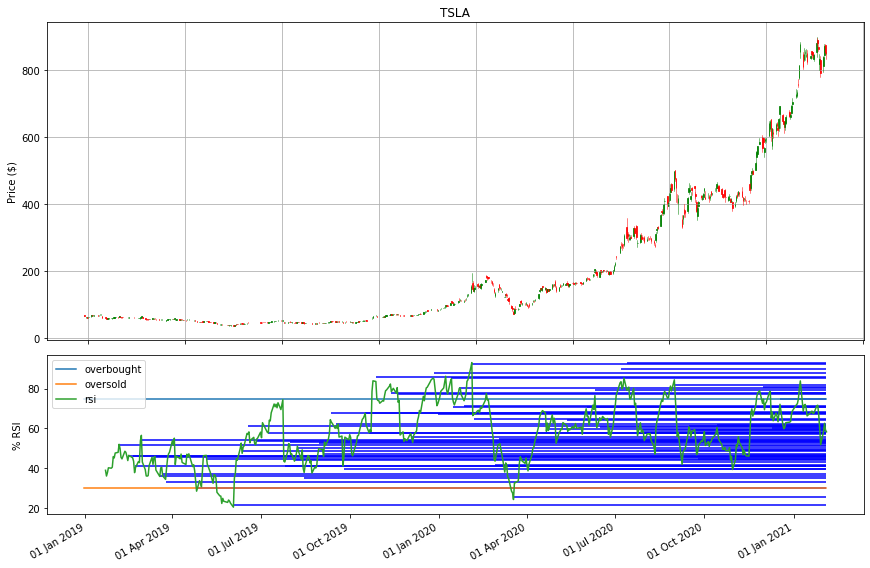

In [7]:
plotRsiSupportResistance(0)

In [8]:
#s=[]
#for num in range(len(num_name)):
s= np.mean(data_frames_separate[0]['RsiHigh'] - data_frames_separate[0]['RsiLow'])
s=s*15
s

-7.699092230652905

In [9]:
def isFarFromLevel(l):

  return np.sum([abs(l-x) < s  for x in levels]) == 0

In [10]:
len(levels)

74

In [11]:
#levels = [[] for i in range(len(num_name))]
#for num in range(len(levels)):
levels=[]
for i in range(2,data_frames_separate[0].shape[0]-2):
        if isSupportRSI(data_frames_separate[0],i):
            l = data_frames_separate[0]['RsiLow'][i]

            if isFarFromLevel(l):
                  levels.append((i,l))

        elif isResistanceRSI(data_frames_separate[0],i):
            l = data_frames_separate[0]['RsiHigh'][i]

            if isFarFromLevel(l):
                  levels.append((i,l))
len(levels)

74

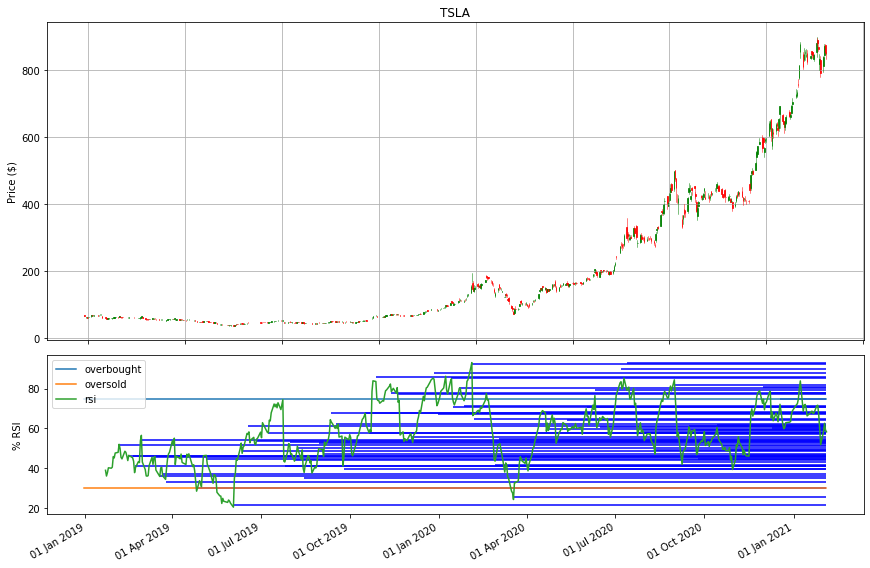

In [12]:
plotRsiSupportResistance(0)

In [8]:
def isSupport(df,i):
  support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] \
  and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]

  return support

def isResistance(df,i):
  resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] \
  and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2] 

  return resistance

In [11]:
#levels = [[] for i in range(len(num_name))]
levels=[]
#for a in range(len(level)):
for i in range(2,data_frames_separate[0].shape[0]-2):
      if isSupport(data_frames_separate[0],i):
        levels.append((i,data_frames_separate[0]['Low'][i]))
      elif isResistance(data_frames_separate[0],i):
        levels.append((i,data_frames_separate[0]['High'][i]))
len(levels)
levels

[(2, 34.62331202532922),
 (6, 37.67845345109018),
 (13, 38.495267674466085),
 (15, 36.98842971911468),
 (25, 42.8085574027805),
 (27, 41.24131845771408),
 (37, 43.06561791616511),
 (42, 43.52597358077648),
 (46, 41.505783421565624),
 (58, 45.19845540627146),
 (78, 51.05089392050064),
 (91, 44.94725296290946),
 (94, 47.31198851091056),
 (105, 41.854901205322946),
 (119, 49.37191764727032),
 (142, 50.81731097743828),
 (162, 52.91282467553399),
 (166, 50.16897777121598),
 (176, 55.86886948809403),
 (181, 55.21251926095524),
 (189, 56.31301973223136),
 (191, 53.083078145034186),
 (193, 56.73496244286446),
 (198, 58.75830021337894),
 (211, 58.543629149511005),
 (224, 66.3272197328586),
 (233, 63.42912111162705),
 (236, 67.06969892200381),
 (246, 68.94071620064885),
 (253, 74.39538375959914),
 (271, 81.13948116603778),
 (274, 74.79632558719902),
 (277, 80.48858418594696),
 (279, 77.85897647273852),
 (281, 81.1757580700274),
 (286, 80.53820487420776),
 (292, 63.599504876349656),
 (294, 75.415

In [13]:
def plotSupportResistance(num):
  fig, ax = plt.subplots()

  #candlestick_ohlc(ax,data_frames_separate[num].values,width=0.6, \
                   #colorup='green', colordown='red', alpha=0.8)

  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()
  plt.title(num_name[num])
  fig.tight_layout()

  for level in levelsRSI[num]:
    plt.hlines(level[1],xmin=data_frames_separate[num]['Date'][level[0]],\
               xmax=max(data_frames_separate[num]['Date']),colors='blue')

TypeError: 'int' object is not subscriptable

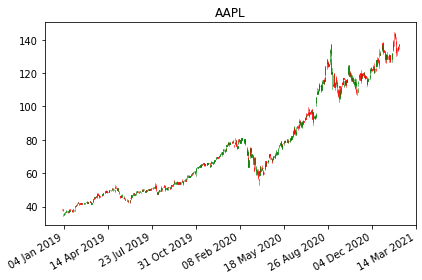

In [14]:
for i in range(len(num_name)):
    plotSupportResistance(0)